# **WEEK 3 TASK - HOUSE PRICE PREDICTION**

Reading and downloading the dataset from Kaggle

In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashwini008","key":"50996fb4c40b440dfdbeb730aeb6a249"}'}

In [7]:
#create a kaggle folder
! mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
! cp kaggle.json ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

Importing csv file

In [5]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [9]:
import numpy as np
import pandas as pd
df = pd.read_csv("/content/grive/MyDrive/HousingData.csv") 
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [10]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [12]:
perc = 60.0 
min_count =  int(((100-perc)/100)*df.shape[1] + 1)
mod_df = df.dropna( axis=0, thresh=min_count)
df= mod_df
print(df)

        CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31   0.0  0.538  ...  296     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222     18.7  396.90    NaN  36.2
..       ...   ...    ...   ...    ...  ...  ...      ...     ...    ...   ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273     21.0  391.99    NaN  22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273     21.0  396.90   7.88  11.9

[506 rows x 14 columns]


In [13]:
df = df.fillna(df.mode().iloc[0])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,6.36,36.2


[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 1.00000000e+00
  8.96799117e-02 4.22222222e-01]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 1.00000000e+00
  2.04470199e-01 3.68888889e-01]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 9.89737254e-01
  6.34657837e-02 6.60000000e-01]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.07891832e-01 4.20000000e-01]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 9.91300620e-01
  1.31070640e-01 3.77777778e-01]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.69701987e-01 1.53333333e-01]]


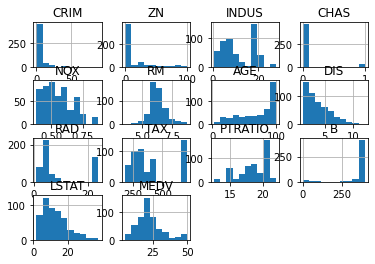

In [14]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from pandas import DataFrame
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
print(scaled)
dataset = DataFrame(df)
dataset.hist()
pyplot.show()

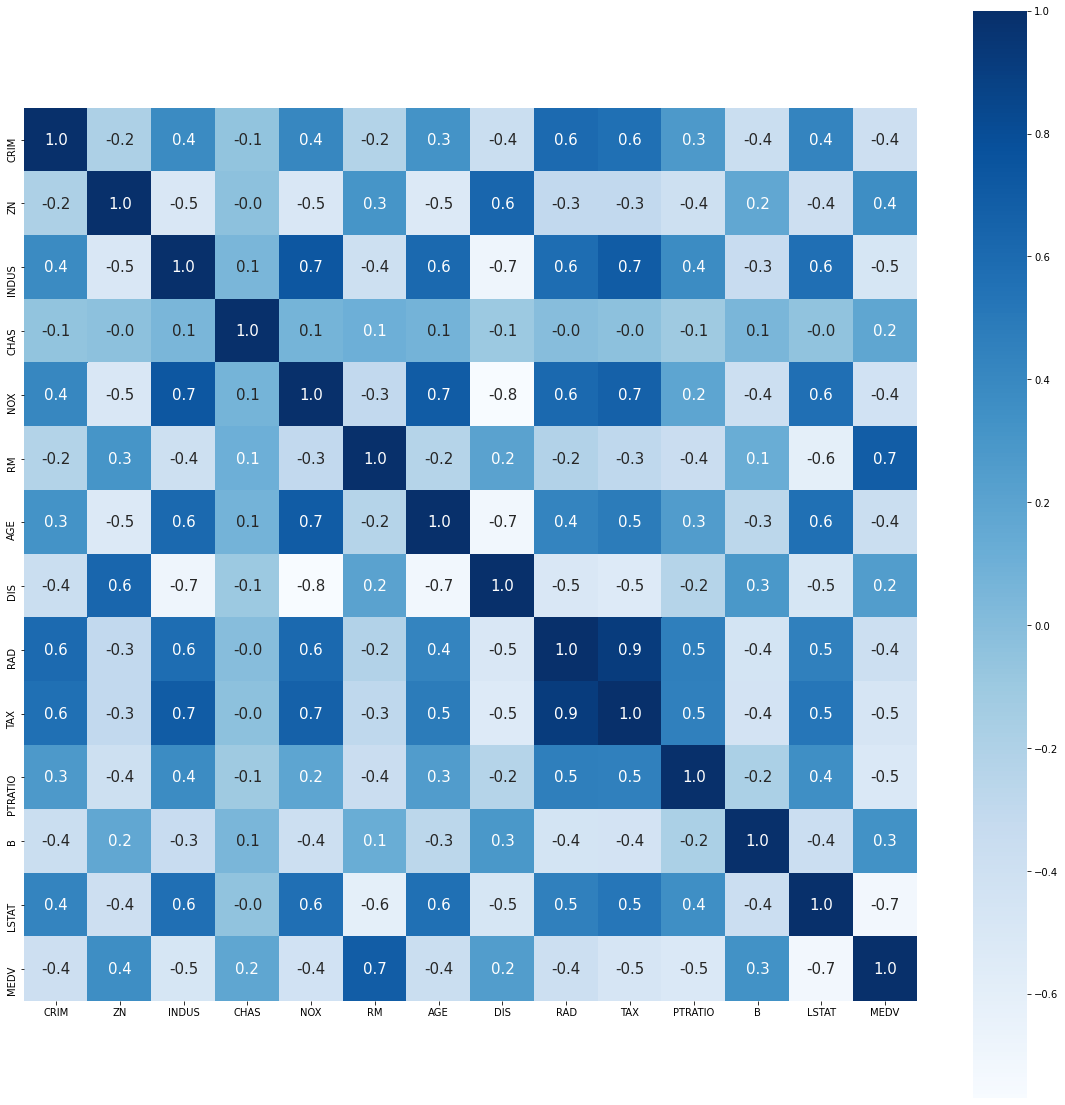

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

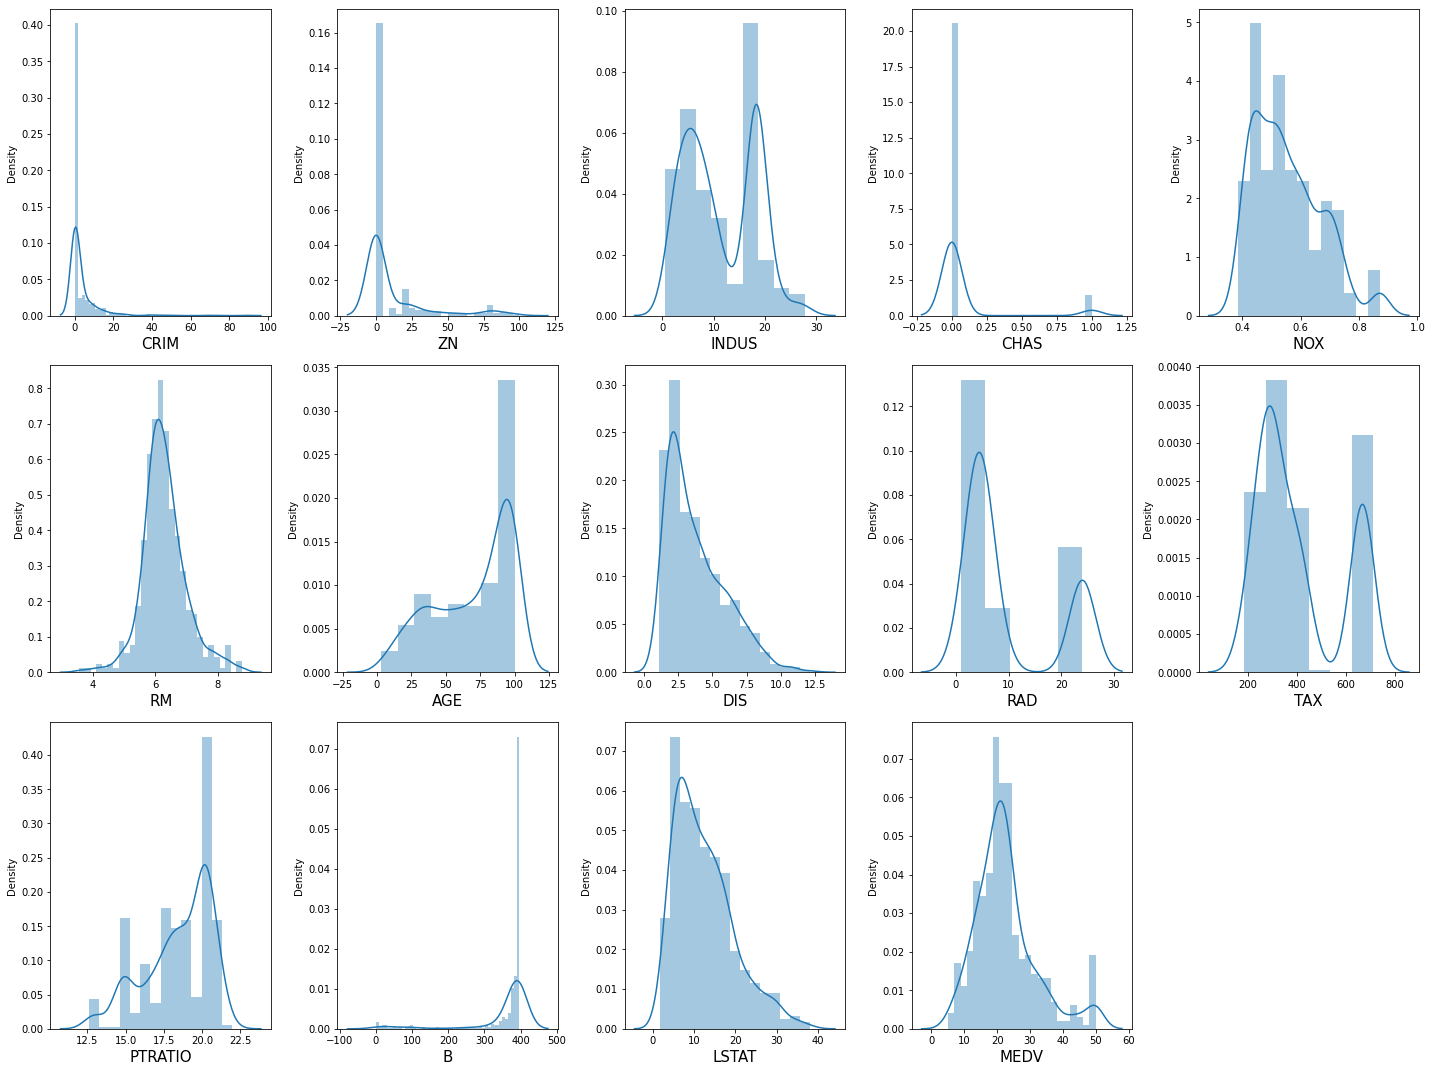

In [16]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

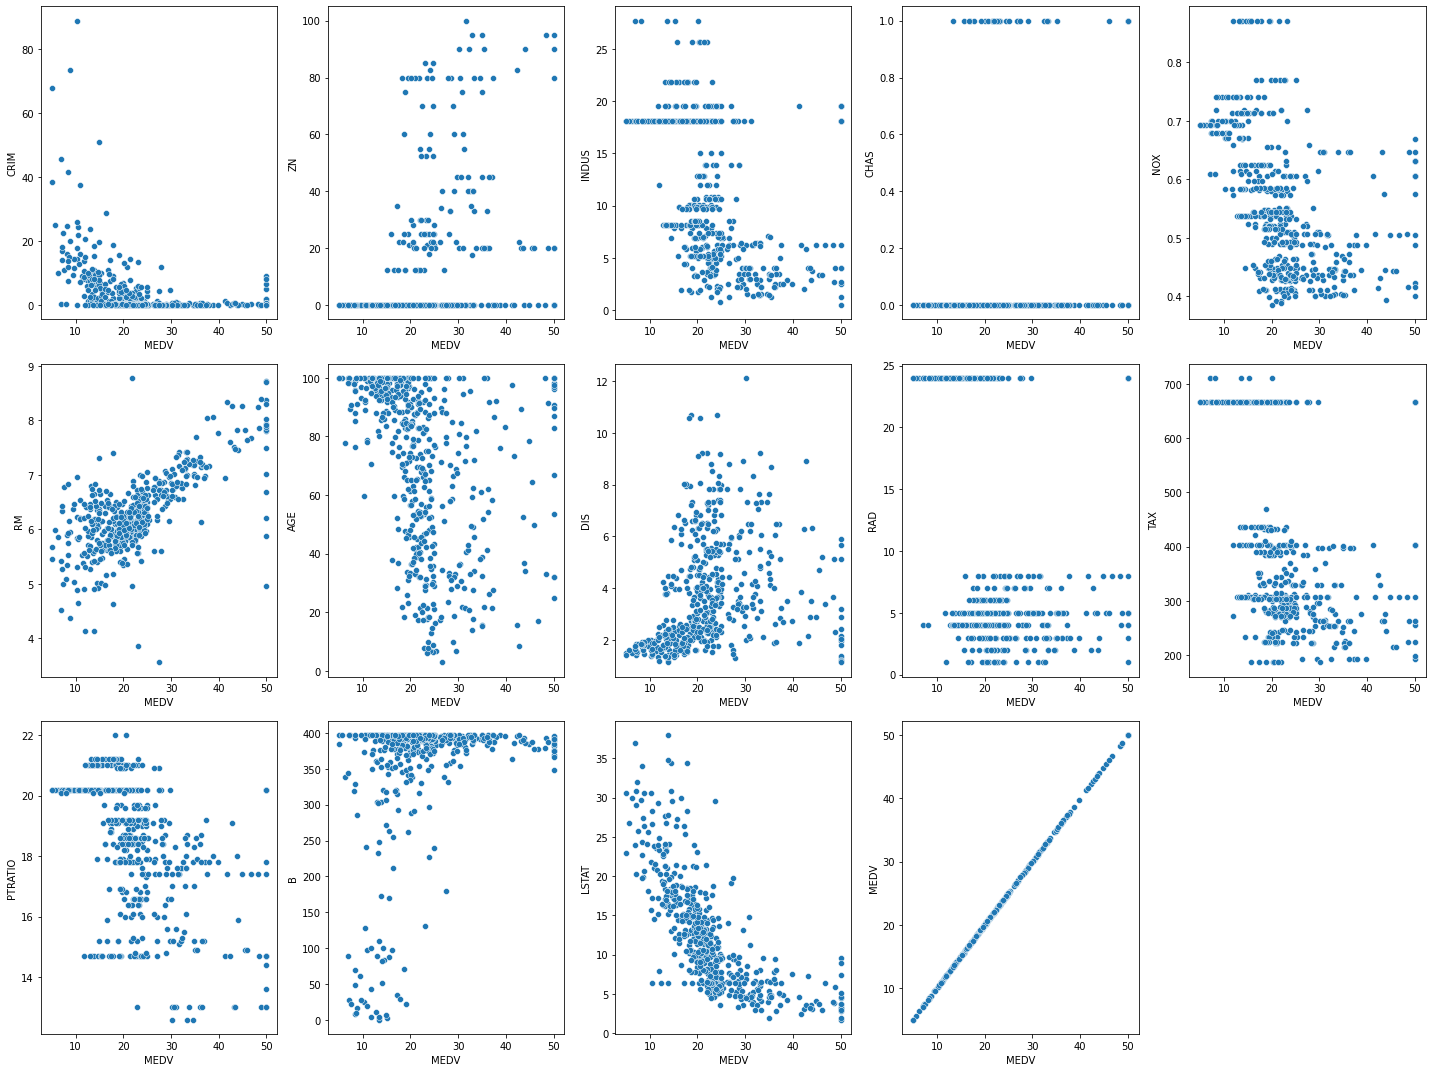

In [17]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = df['MEDV'], y = df[column])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

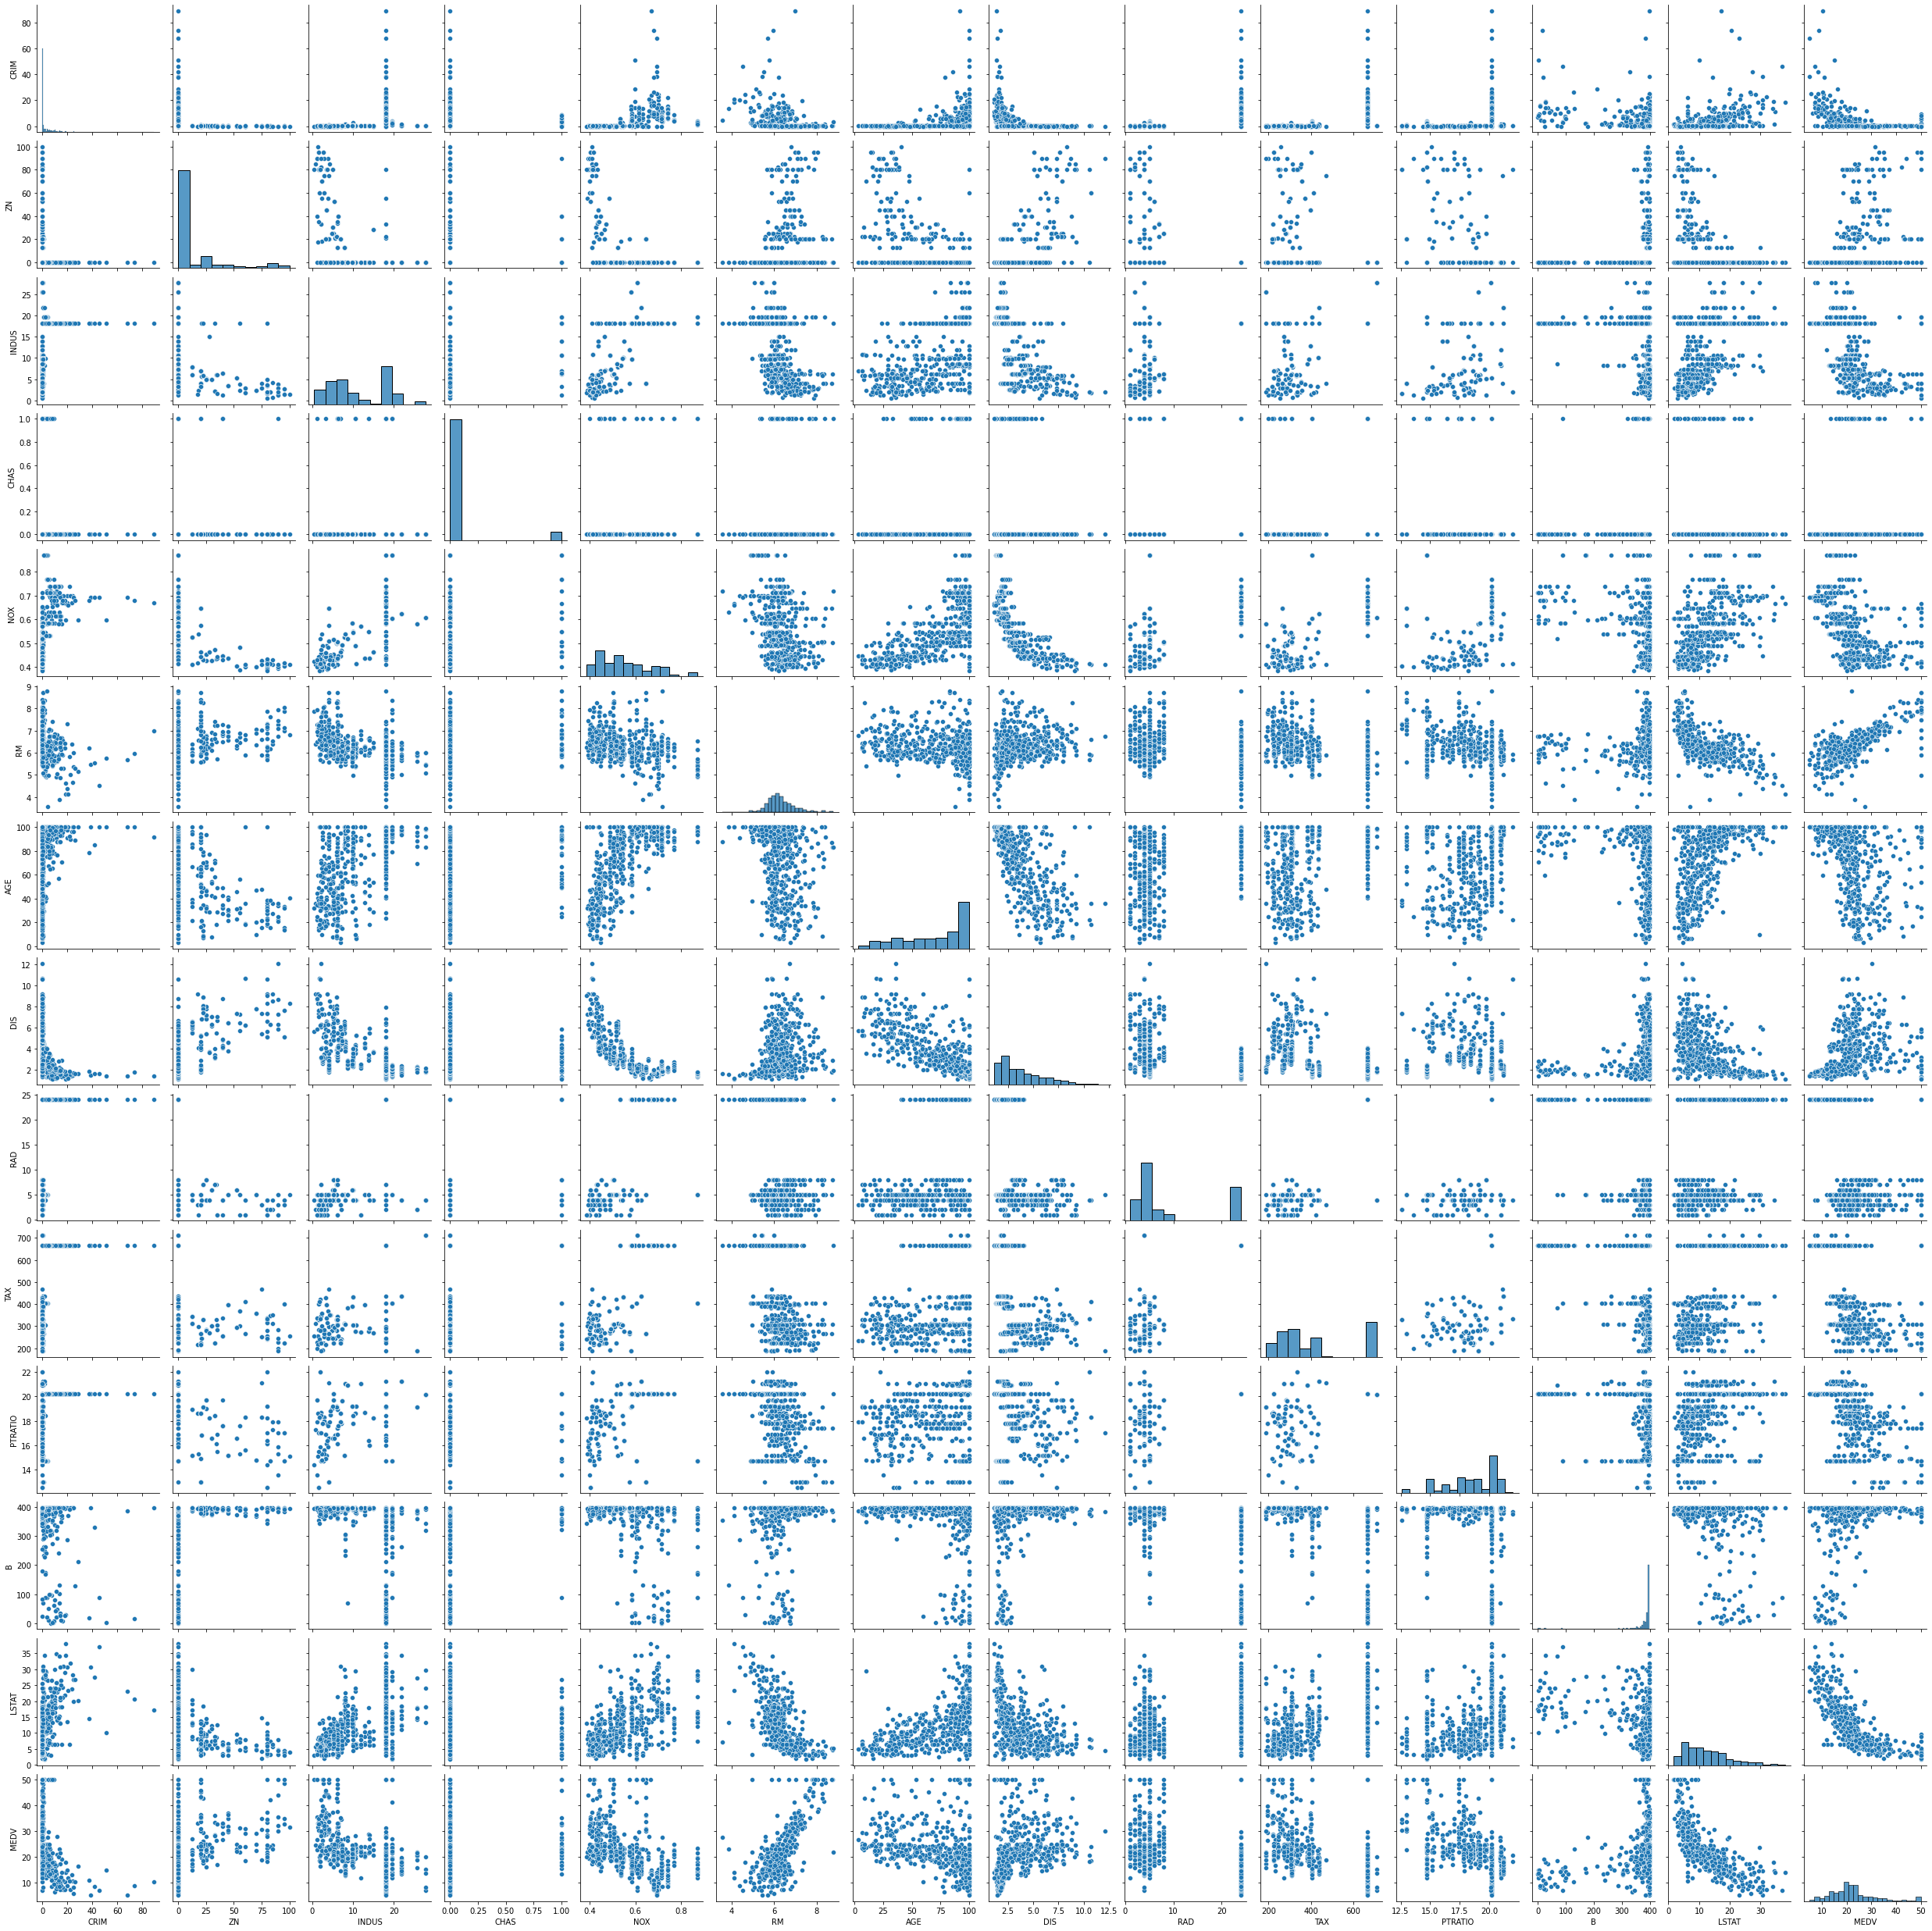

In [18]:
sns.pairplot(dataset)

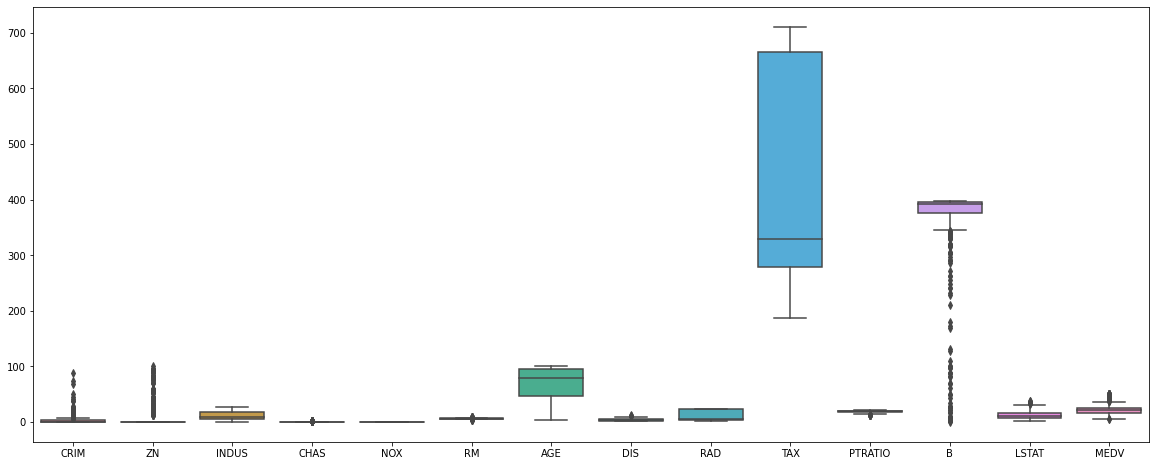

In [20]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()

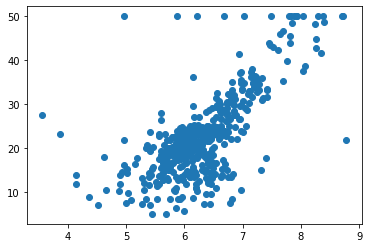

In [21]:
predictor = df[["RM"]]
target = df[["MEDV"]]
plt.scatter(predictor,target)

In [22]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X = df.drop('MEDV',axis=1)
y = df['MEDV']
print(df.shape)
print(X.shape)
print(y.shape)

(506, 14)
(506, 13)
(506,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (404, 13)
X_test:  (102, 13)
y_train:  (404,)
y_test:  (102,)


In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
print("Intercept: ", regressor.intercept_)

Intercept:  31.475954366686008


In [37]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.105012
ZN,0.041238
INDUS,-0.083345
CHAS,2.844149
NOX,-11.801521
RM,4.039870
AGE,-0.011158
DIS,-1.289825
RAD,0.298583
TAX,-0.015215


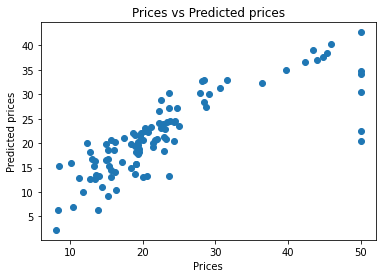

In [38]:
pred_linreg = regressor.predict(X_test)
plt.scatter(y_test,pred_linreg)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

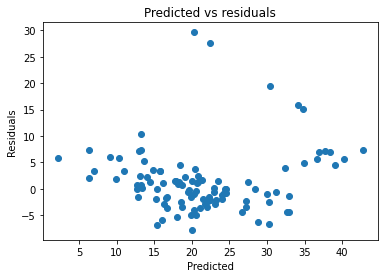

In [39]:
plt.scatter(pred_linreg,y_test-pred_linreg)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of the predicted values')

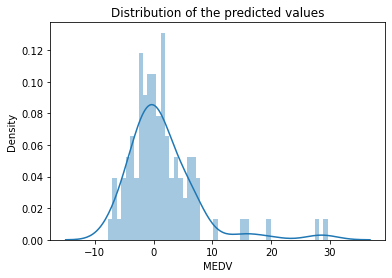

In [40]:
sns.distplot((y_test-pred_linreg),bins=50)
plt.title("Distribution of the predicted values")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


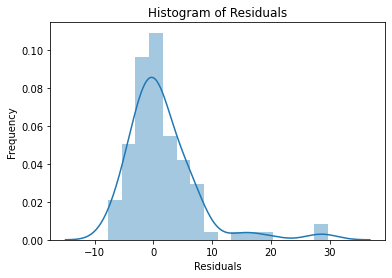

In [41]:
sns.distplot(y_test-pred_linreg)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [42]:
from sklearn import metrics
import numpy as np 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_linreg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_linreg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_linreg)))
print('R^2:',metrics.r2_score(y_test, pred_linreg))

Mean Absolute Error: 3.9291280260356896
Mean Squared Error: 38.238053472247636
Root Mean Squared Error: 6.183692543476562
R^2: 0.6535347268442437


In [43]:
x = regressor.score(X_test, y_test)
print(x)

0.6535347268442437


In [44]:
regressorscore= x*100
print("Regressor Score: ",regressorscore)

Regressor Score:  65.35347268442437


In [45]:
import random
n = random.randint(0,101)
print("Sample number: ", n)

Sample number:  7


In [46]:
sse = np.square(y_test.iloc[n] - pred_linreg[n])
print("The mean squared error is: ", sse)
print("Actual value is: ", y_test.iloc[n])
print("Predicted value is: ", pred_linreg[n])

The mean squared error is:  11.991170338620313
Actual value is:  10.4
Predicted value is:  6.937173071229186


In [47]:

import matplotlib.pyplot as plt  
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
boston=datasets.load_boston()
x=boston.data[:,:]
y=boston.target
print(x.shape,y.shape)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

(506, 13) (506,)


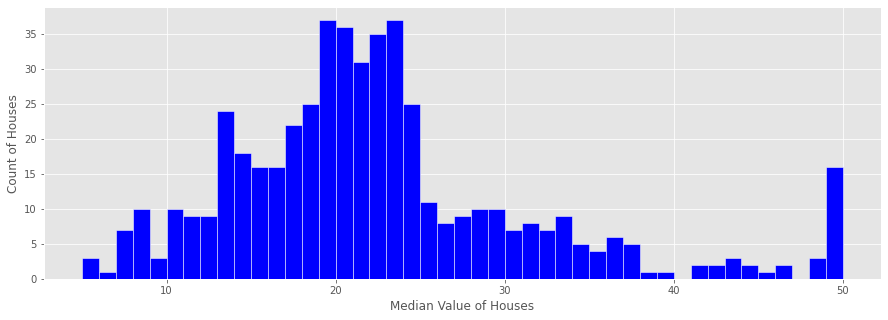

In [48]:
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plot = plt.hist(df.MEDV, bins=45, color='b', edgecolor = 'white')
plt.xlabel('Median Value of Houses')
plt.ylabel('Count of Houses')
plt.show()

In [49]:
def dis(v,w):
    return np.sqrt(np.sum((v-w)**2))
def knn_r(tr, tr_lab, te , k):
    distances = []
    
    for i in range(tr.shape[0]):
        distances.append(dis(tr[i], te))
    
    distances = np.array(distances)
    inds = np.argsort(distances)
    
    distances = distances[inds]
    tr_lab_2 = tr_lab[inds]
    value = np.average(tr_lab_2[:k])
    
    return value

In [50]:
def knn_reg(tr , tr_lab, te , te_lab , k):
    preds = []
    for i in range(te.shape[0]):
        value = knn_r(tr, tr_lab, te[i] , k)
        preds.append(value)
    
    preds  = np.array(preds)
    err = mean_squared_error(te_lab , preds)
    return err
acc = knn_reg(xtrain , ytrain , xtest , ytest ,5)
print ("MEAN SQUARED ERROR:",acc)
print("Actual value is: ", y_test.iloc[n])
print("Predicted value is: ", pred_linreg[n])

MEAN SQUARED ERROR: 25.860125490196076
Actual value is:  10.4
Predicted value is:  6.937173071229186
